In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

algeria_fire = pd.read_csv(r"D:\S3\data_mining\viirs-jpss1_2024_Algeria.csv")
tunis_fire = pd.read_csv(r"D:\S3\data_mining\viirs-jpss1_2024_Tunisia.csv")

print(algeria_fire.shape)
print(algeria_fire.isnull().sum())



(87446, 15)
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
dtype: int64


In [6]:
print(tunis_fire.shape)
print(tunis_fire.isnull().sum())

(2804, 15)
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
dtype: int64


In [7]:
algeria_fire = algeria_fire[algeria_fire["type"] == 0]
tunis_fire = tunis_fire[tunis_fire["type"] == 0]

print(tabulate(algeria_fire.head(60), headers='keys', tablefmt='simple'))
print(tabulate(tunis_fire.head(10), headers='keys', tablefmt='simple'))

       latitude    longitude    bright_ti4    scan    track  acq_date      acq_time  satellite    instrument    confidence      version    bright_ti5    frp  daynight      type
---  ----------  -----------  ------------  ------  -------  ----------  ----------  -----------  ------------  ------------  ---------  ------------  -----  ----------  ------
  5     35.7075      5.53337        312.32    0.45     0.39  2024-01-01         141  N20          VIIRS         n                     2        268.88   1.25  N                0
 13     32.1358      6.46961        326.8     0.56     0.43  2024-01-01         142  N20          VIIRS         n                     2        279.44   5.52  N                0
 20     32.3556      6.9763         341.76    0.39     0.44  2024-01-01         142  N20          VIIRS         n                     2        280.66  10.25  N                0
 64     28.1979      9.39581        327.82    0.33     0.55  2024-01-01         143  N20          VIIRS         n  

In [8]:
number_low = (algeria_fire["confidence"] == 'l').sum()
print(number_low)

1185


In [9]:
algeria_fire = algeria_fire[algeria_fire["confidence"] != 'l']

In [10]:
number_low = (tunis_fire["confidence"] == 'l').sum()
print(number_low)

print(f"percentage : {(number_low / tunis_fire.shape[0]):.2f}")

107
percentage : 0.11


In [11]:
tunis_fire = tunis_fire[tunis_fire["confidence"] != 'l']
print(tunis_fire.shape)

(893, 15)


In [12]:
print(algeria_fire.columns)
print(tunis_fire.columns)

Index(['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight', 'type'],
      dtype='object')
Index(['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight', 'type'],
      dtype='object')


In [13]:
fire_algeria_to_shp = gpd.GeoDataFrame(algeria_fire , crs="EPSG:4326" , geometry=gpd.points_from_xy(algeria_fire["longitude"] , algeria_fire["latitude"]))
fire_tunis_to_shp = gpd.GeoDataFrame(tunis_fire , crs="EPSG:4326" , geometry=gpd.points_from_xy(tunis_fire["longitude"] , tunis_fire["latitude"]))

fire_algeria_to_shp.to_file(r"D:\S3\data_mining\projet\clean_data\algeria_fire_shape\algeria_frie_shape.shp")
fire_tunis_to_shp.to_file(r"D:\S3\data_mining\projet\clean_data\tunisia_fire_shape\tunisia_frie_shape.shp")

In [14]:
algeria_fire = algeria_fire.drop(columns=['bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight', 'type'] , axis = 1)

print(tabulate(algeria_fire.head(), headers='keys', tablefmt='simple'))


      latitude    longitude
--  ----------  -----------
 5     35.7075      5.53337
13     32.1358      6.46961
20     32.3556      6.9763
64     28.1979      9.39581
67     28.1283      9.49323


In [15]:
tunis_fire = tunis_fire.drop(columns=['bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight', 'type'] , axis = 1)

print(tabulate(tunis_fire.head(), headers='keys', tablefmt='simple'))

      latitude    longitude
--  ----------  -----------
 1     31.4929      9.48947
 2     31.4952      9.49053
 5     31.4945      9.49368
 6     31.4942      9.49154
11     36.9341     10.0912


In [16]:
common_crs = "EPSG:4326"  # WGS84 - most common geographic CRS

fire_algeria_to_shp = fire_algeria_to_shp.to_crs(common_crs)
fire_tunis_to_shp = fire_tunis_to_shp.to_crs(common_crs)


<Axes: >

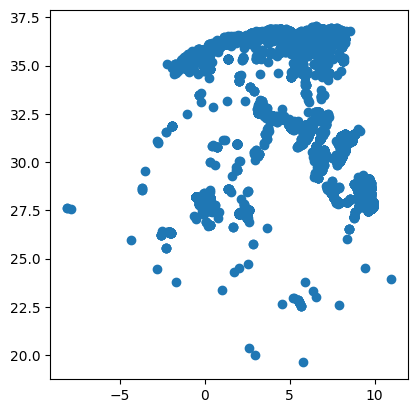

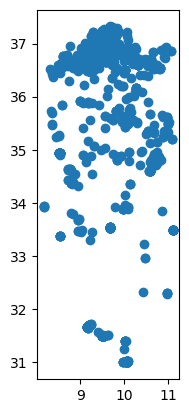

In [17]:
algeria_fire_shape = gpd.read_file(r"D:\S3\data_mining\projet\clean_data\algeria_fire_shape\algeria_frie_shape.shp")
algeria_fire_shape.plot()

tunisia_fire_shape = gpd.read_file(r"D:\S3\data_mining\projet\clean_data\tunisia_fire_shape\tunisia_frie_shape.shp")
tunisia_fire_shape.plot()

now Land Cover

In [13]:
algeria_shape = gpd.read_file(r"D:\S3\data_mining\geonetwork_algeria\dza_gc_adg.shp")
tunis_shape = gpd.read_file(r"D:\S3\data_mining\geonetwrok_tunisia\tun_gc_adg.shp")

now climate

In [18]:
import glob
folder = r"D:\S3\data_mining\projet\max_climate\tmax"
tif_files = sorted(glob.glob(folder + "*.tif"))

print(tif_files)

[]


In [24]:
import rasterio
import glob
import numpy as np

folder = r"D:\S3\data_mining\projet\percepitation_climate\precipitations\\"  
tif_files = sorted(glob.glob(folder + "*.tif"))

for f in tif_files:
    print(f"\nReading file: {f}")
    
    with rasterio.open(f) as src:
        data = src.read(1)  
        nodata = src.nodata

    if nodata is not None:
        data = np.where(data == nodata, np.nan, data)

    total_pixels = data.size
    nan_pixels = np.isnan(data).sum()
    min_val = np.nanmin(data)
    max_val = np.nanmax(data)
    mean_val = np.nanmean(data)

    print(f"Total pixels: {total_pixels}")
    print(f"Null/NaN pixels: {nan_pixels}")
    print(f"Min value: {min_val}")
    print(f"Max value: {max_val}")
    print(f"Mean value: {mean_val}")



Reading file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-01.tif
Total pixels: 54560
Null/NaN pixels: 21633
Min value: 0.0
Max value: 139.125
Mean value: 4.3067240715026855

Reading file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-02.tif
Total pixels: 54560
Null/NaN pixels: 21633
Min value: 0.0
Max value: 266.1499938964844
Mean value: 8.620646476745605

Reading file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-03.tif
Total pixels: 54560
Null/NaN pixels: 21633
Min value: 0.0
Max value: 49.67499923706055
Mean value: 4.421582221984863

Reading file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-04.tif
Total pixels: 54560
Null/NaN pixels: 21633
Min value: 0.0
Max value: 93.05000305175781
Mean value: 6.301054954528809

Reading file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4

In [25]:
import rasterio
import glob
import numpy as np
from scipy.ndimage import generic_filter

folder = r"D:\S3\data_mining\projet\percepitation_climate\precipitations\\"
tif_files = sorted(glob.glob(folder + "*.tif"))

# Define a function to compute mean ignoring NaNs
def nanmean_filter(values):
    values = np.array(values)
    return np.nanmean(values)

# Size of the neighborhood window (5 pixels = 11x11 window)
window_size = 11  # 5 pixels on each side + center pixel

for f in tif_files:
    print(f"\nProcessing file: {f}")
    
    with rasterio.open(f) as src:
        data = src.read(1)
        nodata = src.nodata
        profile = src.profile

    # Convert nodata to np.nan
    if nodata is not None:
        data = np.where(data == nodata, np.nan, data)

    # Identify NaNs
    nan_mask = np.isnan(data)

    # Apply the mean filter only to NaNs
    imputed = data.copy()
    
    # Compute local mean for all pixels
    local_mean = generic_filter(imputed, nanmean_filter, size=window_size, mode='nearest')

    # Replace NaNs with local mean
    imputed[nan_mask] = local_mean[nan_mask]

    print(f"Filled {np.isnan(data).sum()} nulls")

    # Save imputed raster
    out_file = f.replace(".tif", "_imputed_local.tif")
    with rasterio.open(out_file, "w", **profile) as dst:
        dst.write(imputed, 1)



Processing file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-01.tif


C:\Users\serra\AppData\Local\Temp\ipykernel_4068\3274202491.py:12: RuntimeWarning: Mean of empty slice
  return np.nanmean(values)


Filled 21633 nulls

Processing file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-02.tif
Filled 21633 nulls

Processing file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-03.tif
Filled 21633 nulls

Processing file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-04.tif
Filled 21633 nulls

Processing file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-05.tif
Filled 21633 nulls

Processing file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-06.tif
Filled 21633 nulls

Processing file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-07.tif
Filled 21633 nulls

Processing file: D:\S3\data_mining\projet\percepitation_climate\precipitations\wc2.1_cruts4.09_5m_prec_2024-08.tif
Filled 21633 nulls

Processing file: D:\S3\data_mining\

In [26]:
"""import rasterio
import numpy as np
import pandas as pd
import glob
import re

folder = r"D:\S3\data_mining\projet\clipped_imputed_data\\"  # your cleaned .tif folder

tif_files = sorted(glob.glob(folder + "*.tif"))

records = []

for f in tif_files:
    # Example filename pattern: wc2.1_cruts4.09_5m_tmin_2020-01.tif
    match = re.search(r"_(tmin|tmax|prec)_(\d{4})-(\d{2})", f)
    if not match:
        continue
    variable, year, month = match.groups()
    year, month = int(year), int(month)

    with rasterio.open(f) as src:
        data = src.read(1)
        transform = src.transform
        nodata = src.nodata

    # Replace nodata with NaN just in case
    if nodata is not None:
        data = np.where(data == nodata, np.nan, data)

    # Get valid pixel indices
    rows, cols = np.where(~np.isnan(data))
    values = data[rows, cols]

    # Convert pixel (row, col) → lon/lat
    lons, lats = rasterio.transform.xy(transform, rows, cols)
    pixel_ids = rows * data.shape[1] + cols

    df = pd.DataFrame({
        "pixel_id": pixel_ids,
        "longitude": lons,
        "latitude": lats,
        "variable": variable,
        "year": year,
        "month": month,
        "value": values
    })

    records.append(df)

# Combine all records
climate_df = pd.concat(records, ignore_index=True)

# Save the LONG format
climate_df.to_csv("climate_long.csv", index=False)

# Convert to WIDE format
pivot_df = climate_df.pivot_table(
    index=["pixel_id", "latitude" , "longitude"],
    columns=["variable", "year", "month"],
    values="value"
)

pivot_df.columns = ['{}_{}_{}'.format(var, y, m) for var, y, m in pivot_df.columns]
pivot_df = pivot_df.reset_index()

# Save the WIDE format
pivot_df.to_csv("climate_wide.csv", index=False)

print("✅ Long and wide CSV files created successfully!")
"""

"""
import rasterio
import numpy as np
import pandas as pd
import glob
import re

folder = r"D:\S3\data_mining\projet\clipped_imputed_data\\"  # your cleaned .tif folder

tif_files = sorted(glob.glob(folder + "*.tif"))

records = []
raster_width = None  # <-- needed to reconstruct row/col

for f in tif_files:
    # Example filename pattern: wc2.1_cruts4.09_5m_tmin_2020-01.tif
    match = re.search(r"_(tmin|tmax|prec)_(\d{4})-(\d{2})", f)
    if not match:
        continue
    variable, year, month = match.groups()
    year, month = int(year), int(month)

    with rasterio.open(f) as src:
        data = src.read(1)
        transform = src.transform
        nodata = src.nodata

        if raster_width is None:
            raster_width = data.shape[1]  # <-- store width only once

    # Replace nodata with NaN
    if nodata is not None:
        data = np.where(data == nodata, np.nan, data)

    # Get valid pixel indices
    rows, cols = np.where(~np.isnan(data))
    values = data[rows, cols]

    # lon/lat from pixel indices
    lons, lats = rasterio.transform.xy(transform, rows, cols)

    # UNIQUE pixel id
    pixel_ids = rows * raster_width + cols

    df = pd.DataFrame({
        "pixel_id": pixel_ids,
        "row": rows,          # <---- ADD ROW
        "col": cols,          # <---- ADD COL
        "longitude": lons,
        "latitude": lats,
        "variable": variable,
        "year": year,
        "month": month,
        "value": values
    })

    records.append(df)

# Combine all records
climate_df = pd.concat(records, ignore_index=True)

# Save the LONG format
climate_df.to_csv("climate_long.csv", index=False)

# ---- WIDE FORMAT ----
pivot_df = climate_df.pivot_table(
    index=["pixel_id", "row", "col", "latitude", "longitude"],
    columns=["variable", "year", "month"],
    values="value"
)"""

"""pivot_df.columns = ['{}_{}_{}'.format(var, y, m) for var, y, m in pivot_df.columns]
pivot_df = pivot_df.reset_index()

pivot_df.to_csv("climate_wide.csv", index=False)

print("✅ Long and wide CSV files created successfully!")
print("🔥 row/col added — merging with fire data will now work!")"""


import rasterio
import numpy as np
import pandas as pd
import glob

folder = r"D:\S3\data_mining\projet\percepitation_climate\precipitations\\"

tif_files = sorted(glob.glob(folder + "*.tif"))

records = []

for f in tif_files:
    filename = f.split("\\")[-1]
    parts = filename.split("_")

    # Example: ["wc2.1", "cruts4.09", "5m", "tmin", "2024-01.tif"]
    variable = parts[3]
    
    year_month = parts[4]            # "2024-01.tif"
    year = int(year_month[:4])
    month = int(year_month[5:7])

    with rasterio.open(f) as src:
        data = src.read(1)
        transform = src.transform
        nodata = src.nodata

    if nodata is not None:
        data = np.where(data == nodata, np.nan, data)

    rows, cols = np.where(~np.isnan(data))
    values = data[rows, cols]

    lons, lats = rasterio.transform.xy(transform, rows, cols)
    pixel_ids = rows * data.shape[1] + cols

    df = pd.DataFrame({
        "pixel_id": pixel_ids,
        "row": rows,
        "col": cols,
        "longitude": lons,
        "latitude": lats,
        "variable": variable,
        "year": year,
        "month": month,
        "value": values
    })

    records.append(df)

# Combine everything
climate_df = pd.concat(records, ignore_index=True)

climate_df.to_csv("climate_long.csv", index=False)

pivot_df = climate_df.pivot_table(
    index=["pixel_id", "row", "col", "latitude", "longitude"],
    columns=["variable", "year", "month"],
    values="value"
)

pivot_df.columns = ['{}_{}_{}'.format(var, y, m) for var, y, m in pivot_df.columns]
pivot_df = pivot_df.reset_index()

pivot_df.to_csv("climate_wide.csv", index=False)

print("Done!")


<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:79: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:79: SyntaxWarning: invalid escape sequence '\S'
C:\Users\serra\AppData\Local\Temp\ipykernel_4068\332327184.py:7: SyntaxWarning: invalid escape sequence '\S'
  folder = r"D:\S3\data_mining\projet\clipped_imputed_data\\"  # your cleaned .tif folder
C:\Users\serra\AppData\Local\Temp\ipykernel_4068\332327184.py:79: SyntaxWarning: invalid escape sequence '\S'
  folder = r"D:\S3\data_mining\projet\clipped_imputed_data\\"  # your cleaned .tif folder


Done!


In [23]:
print(pivot_df.columns)

Index(['pixel_id', 'row', 'col', 'latitude', 'longitude', 'tmax_2024_1',
       'tmax_2024_2', 'tmax_2024_3', 'tmax_2024_4', 'tmax_2024_5',
       'tmax_2024_6', 'tmax_2024_7', 'tmax_2024_8', 'tmax_2024_9',
       'tmax_2024_10', 'tmax_2024_11', 'tmax_2024_12'],
      dtype='object')


In [ ]:
"""pivot_df = pivot_df.drop(columns=['tmin_2020_1',
       'tmin_2020_2', 'tmin_2020_3', 'tmin_2020_4', 'tmin_2020_5',
       'tmin_2020_6', 'tmin_2020_7', 'tmin_2020_8', 'tmin_2020_9',
       'tmin_2020_10', 'tmin_2020_11', 'tmin_2020_12', 'tmin_2021_1',
       'tmin_2021_2', 'tmin_2021_3', 'tmin_2021_4', 'tmin_2021_5',
       'tmin_2021_6', 'tmin_2021_7', 'tmin_2021_8', 'tmin_2021_9',
       'tmin_2021_10', 'tmin_2021_11', 'tmin_2021_12', 'tmin_2022_1',
       'tmin_2022_2', 'tmin_2022_3', 'tmin_2022_4', 'tmin_2022_5',
       'tmin_2022_6', 'tmin_2022_7', 'tmin_2022_8', 'tmin_2022_9',
       'tmin_2022_10', 'tmin_2022_11', 'tmin_2022_12', 'tmin_2023_1',
       'tmin_2023_2', 'tmin_2023_3', 'tmin_2023_4', 'tmin_2023_5',
       'tmin_2023_6', 'tmin_2023_7', 'tmin_2023_8', 'tmin_2023_9',
       'tmin_2023_10', 'tmin_2023_11', 'tmin_2023_12'] , axis=1)"""

In [ ]:
pivot_df = pd.read_csv(r"D:\S3\data_mining\projet\clipped_imputed_data2")

In [44]:
print(tabulate(pivot_df.head(10), headers='keys', tablefmt='simple'))


      pixel_id    row    col    latitude    longitude    tmin_2024_1    tmin_2024_2    tmin_2024_3    tmin_2024_4    tmin_2024_5    tmin_2024_6    tmin_2024_7    tmin_2024_8    tmin_2024_9    tmin_2024_10    tmin_2024_11    tmin_2024_12
--  ----------  -----  -----  ----------  -----------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  --------------  --------------  --------------
 0         144      0    144     37.2917      3.375          8.25           8.25           10             11.5           15             18             21             22             18.25           16.75           13.25           6.75
 1         145      0    145     37.2917      3.45833        8.25           8.25           10.125         11.75          15             18.125         21.25          22             18.375          16.875          13.25           7
 2         146      0    146     37.2917      3.54167        

In [45]:
pivot_df.to_csv("climate_wide.csv", index=False)


In [46]:
fires = pd.concat([algeria_fire, tunis_fire], ignore_index=True)
fires["is_fire"] = 1

print(tabulate(fires.head(10), headers='keys', tablefmt='simple'))
print(f"Merged dataset shape: {fires.shape}")
fires.to_csv(r"D:\S3\data_mining\projet\clean_data\fire_alg_tunis.csv", index=False)



      latitude    longitude    is_fire
--  ----------  -----------  ---------
 0     35.7075      5.53337          1
 1     32.1358      6.46961          1
 2     32.3556      6.9763           1
 3     28.1979      9.39581          1
 4     28.1283      9.49323          1
 5     27.9199      7.86009          1
 6     30.4735      7.02693          1
 7     30.4744      7.0226           1
 8     31.1876      6.78554          1
 9     31.3586      6.05296          1
Merged dataset shape: (12924, 3)


In [88]:
#pivot_df["is_fire"] = 0
#pivot_df = pivot_df.drop(columns=["is_fire"] , axis=1)
print(tabulate(pivot_df.head(10), headers='keys', tablefmt='simple'))


      pixel_id    latitude    longitude    tmin_2024_1    tmin_2024_2    tmin_2024_3    tmin_2024_4    tmin_2024_5    tmin_2024_6    tmin_2024_7
--  ----------  ----------  -----------  -------------  -------------  -------------  -------------  -------------  -------------  -------------
 0         106     37.2917     0.208333        7.25           7.5            9.25           10.25          14.25          19             22
 1         107     37.2917     0.291667        7.125          7.25           9              10.125         14.125         18.875         22
 2         108     37.2917     0.375           7.08333        7.16667        8.91667        10.0833        14.0833        18.9167        22
 3         109     37.2917     0.458333        7.125          7.3125         8.9375         10.25          14.25          18.9375        22
 4         110     37.2917     0.541667        7.16667        7.33333        8.91667        10.2917        14.25          18.9167        22
 5        

In [47]:
def standardize_dataframe_coordinates(df, lon_col='longitude', lat_col='latitude', decimals=6):
    """
    Standardize coordinate precision in a DataFrame
    """
    df = df.copy()
    
    # Round coordinates to consistent precision
    df[lon_col] = df[lon_col].round(decimals)
    df[lat_col] = df[lat_col].round(decimals)
    
    return df

fires = standardize_dataframe_coordinates(df=fires , decimals=5)
pivot_df = standardize_dataframe_coordinates(df=pivot_df , decimals=5)

fires.to_csv(r"D:\S3\data_mining\projet\clean_data\fire_alg_tunis.csv", index=False)
pivot_df.to_csv("climate_wide.csv", index=False)


In [48]:
"""fires[['row','col']] = fires.apply(
    lambda r: pd.Series(fires.index(r['longitude'], r['latitude'])),
    axis=1
)"""

pivot_df[['row','col']] = pivot_df.apply(
    lambda r: pd.Series(pivot_df.index(r['longitude'], r['latitude'])),
    axis=1
)

TypeError: 'RangeIndex' object is not callable

In [49]:
fire_climate_df = pivot_df.merge(
    fires[['latitude', 'longitude', 'is_fire']],
    left_on=['latitude', 'longitude'],           # Columns in pivot_df (climate data)
    right_on=['latitude', 'longitude'], # Columns in fires DataFrame
    how='left'
)

In [50]:
print(fire_climate_df.shape)
print(tabulate(fire_climate_df.head(100), headers='keys', tablefmt='simple'))
print((fire_climate_df["is_fire"] == 1).sum())
fire_climate_df.to_csv(r"D:\S3\data_mining\projet\clean_data\fire_climate.csv", index=False)


(37962, 18)
      pixel_id    row    col    latitude    longitude    tmin_2024_1    tmin_2024_2    tmin_2024_3    tmin_2024_4    tmin_2024_5    tmin_2024_6    tmin_2024_7    tmin_2024_8    tmin_2024_9    tmin_2024_10    tmin_2024_11    tmin_2024_12    is_fire
--  ----------  -----  -----  ----------  -----------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  --------------  --------------  --------------  ---------
 0         144      0    144     37.2917      3.375          8.25           8.25          10              11.5           15             18             21             22             18.25           16.75           13.25           6.75           nan
 1         145      0    145     37.2917      3.45833        8.25           8.25          10.125          11.75          15             18.125         21.25          22             18.375          16.875          13.25           7              

In [100]:
print((fire_climate_df["is_fire"] == 1).sum())


0


to see later

In [26]:
import pandas as pd
from scipy.spatial import cKDTree

# 1️⃣ Load climate data
climate_df = pd.read_csv(r"D:\S3\data_mining\projet\climate_wide.csv")

# 2️⃣ Load fire dataset
#fires = pd.read_csv(r"D:\S3\data_mining\projet\fire_dataset.csv")
fires = fires.rename(columns={"longitude":"lon","latitude":"lat"})
fires = fires[["lon","lat"]].drop_duplicates()

# 3️⃣ Filter fire points inside climate bounds
lon_min, lon_max = climate_df['lon'].min(), climate_df['lon'].max()
lat_min, lat_max = climate_df['lat'].min(), climate_df['lat'].max()
fires_in_bounds = fires[
    (fires['lon'] >= lon_min) & (fires['lon'] <= lon_max) &
    (fires['lat'] >= lat_min) & (fires['lat'] <= lat_max)
]

# 4️⃣ Build KDTree for climate pixels
tree = cKDTree(climate_df[['lon','lat']].values)

# 5️⃣ Find nearest climate pixel for each fire point
_, indices = tree.query(fires_in_bounds[['lon','lat']].values, k=1)

# 6️⃣ Assign is_fire
fire_pixel_ids = set(climate_df.iloc[indices]['pixel_id'])
climate_df['is_fire'] = climate_df['pixel_id'].isin(fire_pixel_ids).astype(int)

print(f"Number of fire pixels assigned: {climate_df['is_fire'].sum()}")


Number of fire pixels assigned: 1393


In [27]:
climate_df.to_csv(r"D:\S3\data_mining\projet\climate_fire_balanced.csv", index=False)

In [21]:
print(climate_df.head(12225))

       pixel_id       lon        lat  tmin_2020_1  tmin_2020_2  tmin_2020_3  \
0           106  0.208333  37.291667     4.250000     7.500000       8.5000   
1           107  0.291667  37.291667     4.125000     7.250000       8.2500   
2           108  0.375000  37.291667     4.083334     7.166666       8.2500   
3           109  0.458333  37.291667     4.125000     7.312500       8.4375   
4           110  0.541667  37.291667     4.250000     7.416666       8.5000   
...         ...       ...        ...          ...          ...          ...   
12220     17046  6.541667  31.625000     5.000000     9.000000      12.0000   
12221     17047  6.625000  31.625000     5.000000     9.000000      12.0000   
12222     17048  6.708333  31.625000     5.000000     9.000000      12.0000   
12223     17049  6.791667  31.625000     5.000000     9.000000      12.0000   
12224     17050  6.875000  31.625000     5.000000     9.000000      12.0000   

       tmin_2020_4  tmin_2020_5  tmin_2020_6  tmin_

In [28]:
import pandas as pd
from scipy.spatial import cKDTree

# === 1️⃣ Load climate data ===
climate_df = pd.read_csv(r"D:\S3\data_mining\projet\climate_wide.csv")

# === 2️⃣ Load fire dataset ===
#fires = pd.read_csv(r"D:\S3\data_mining\projet\fire_dataset.csv")
fires = fires.rename(columns={"longitude":"lon","latitude":"lat"})
fires = fires[["lon","lat"]].drop_duplicates()

# === 3️⃣ Assign fire pixels using KDTree ===
tree = cKDTree(climate_df[['lon','lat']].values)
_, indices = tree.query(fires[['lon','lat']].values, k=1)
fire_pixel_ids = set(climate_df.iloc[indices]['pixel_id'])
climate_df['is_fire'] = climate_df['pixel_id'].isin(fire_pixel_ids).astype(int)

# === 4️⃣ Keep all fire pixels ===
fire_df = climate_df[climate_df['is_fire'] == 1]

# === 5️⃣ Randomly sample non-fire pixels to match fire count ===
nonfire_df = climate_df[climate_df['is_fire'] == 0]
n_fire = len(fire_df)
nonfire_sample = nonfire_df.sample(n=n_fire, random_state=42)

# === 6️⃣ Combine and shuffle ===
balanced_df = pd.concat([fire_df, nonfire_sample], ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# === 7️⃣ Save balanced dataset ===
balanced_df.to_csv(r"D:\S3\data_mining\projet\climate_fire_balanced_between_fire_and_non.csv", index=False)

print(f"✅ Balanced dataset saved: {len(balanced_df)} rows ({len(fire_df)} fire, {len(nonfire_sample)} non-fire)")


✅ Balanced dataset saved: 2788 rows (1394 fire, 1394 non-fire)
